#**주차 수요 분석**
# 단계2 : 탐색적 데이터 분석

## 0.미션

* 미션4 : 이전 파일에서 생성한 base_data에 대해서 탐색적 분석을 수행합니다.
    * 단변량 분석
        * 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스를 파악합니다.
    * 이변량 분석
        * Target은 실차량수(숫자) 입니다.
        * 숫자형 feature --> 숫자형 Target 에 대해 전체 상관계수를 구해 확인합니다.
            * 상관계수가 높은 feature들에 대해 따로 산점도를 그려 확인합니다.
        * 범주형 feature --> 숫자형 Target
            * 평균 비교 barplot(sns.barplot)을 활용하여 비교합니다.
    * 전처리 추가
        * 범주형 feature 중에는 적은 수의 범주가 포함되어 있습니다. 가능한 범주끼리 묶어 봅시다.
    * 관계 정리하기

## 1.환경설정

* 세부 요구사항
    * 제공된 압축파일을 다운받아 압축을 풀고
    * anaconda의 root directory(보통 C:/Users/< ID > 에 project2 폴더를 만들고, 복사해 넣습니다.
    * 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 라이브러리 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
import joblib

In [8]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    
    sns.barplot(x = feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()

    '''
    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])# i가 0, 1, 2,...로 증가하는데, 이 인덱스가 feature의 실제 고유값과 일치하지 않을 수 있음
    '''
    #feature 컬럼의 실제 고유값을 사용하여 그룹을 생성
    unique_vals = df[feature].unique()
    an_list = [df.loc[df[feature] == val, target].dropna() for val in unique_vals]  # 결측치 처리 추가

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")
        
def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])
    
    
    
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()

### (2) 한글폰트 지정

In [10]:
import matplotlib.font_manager as fm

# 설치된 폰트
font_list = [font.name for font in fm.fontManager.ttflist]

# 맑은고딕이 있는지 확인
'Malgun Gothic' in font_list

True

In [11]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### (3) 경로 설정

* project2 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [14]:
path = ''

### (4) 데이터 불러오기

* 단계1에서 저장한 파일을 불러 옵니다.
    * base_data.pkl

In [17]:
base_data = joblib.load(path+'base_data.pkl')

In [18]:
base_data.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_60,전용면적_60_70,전용면적_70_80,전용면적_80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,4393.14,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,983.22,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,5244.69,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,34607.34,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,309.50,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [19]:
base_data.columns

Index(['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수', '총면적',
       '전용면적_10_30', '전용면적_30_40', '전용면적_40_50', '전용면적_50_60', '전용면적_60_70',
       '전용면적_70_80', '전용면적_80_200', '임대보증금', '임대료'],
      dtype='object')

## 2.탐색적 데이터분석

* **세부 요구사항**
    * 기본 분석
        * 기초 통계량, NaN 값 확인 등 기본 분석을 수행합니다.
    * 단변량 분석
        - 단일 변수로 분석 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        - 여러 변수를 묶어서 분석 : 건물구분, 공급유형
    * 이변량 분석
        - 전체 상관계수를 구하고 시각화 합니다.
        - 상관계수가 높은 변수에 대한 산점도를 구해봅니다.

### (1) 기본 분석

* **세부 요구사항**
    - 데이터프레임 전체에 대한 기초통계량을 구합니다.
    - NaN을 확인해 봅시다.

In [24]:
base_data.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,345.0,5.467594e+02,4.323595e+02,1.00,1.780000e+02,491.00,853.00,2.289000e+03
준공연도,345.0,2.006710e+03,8.169892e+00,1970.00,2.001000e+03,2008.00,2013.00,2.022000e+03
실차량수,345.0,5.554319e+02,3.746405e+02,21.00,2.580000e+02,498.00,822.00,1.657000e+03
총면적,345.0,2.632487e+04,2.098324e+04,49.69,8.483260e+03,23018.23,38910.14,1.128894e+05
전용면적_10_30,345.0,4.583768e+01,1.611337e+02,0.00,0.000000e+00,0.00,0.00,1.181000e+03
전용면적_30_40,345.0,1.695130e+02,2.229351e+02,0.00,0.000000e+00,68.00,298.00,1.429000e+03
전용면적_40_50,345.0,1.474551e+02,2.166756e+02,0.00,0.000000e+00,0.00,264.00,1.258000e+03
전용면적_50_60,345.0,1.328899e+02,2.529471e+02,0.00,0.000000e+00,0.00,150.00,1.444000e+03
전용면적_60_70,345.0,1.852174e+00,3.277129e+01,0.00,0.000000e+00,0.00,0.00,6.080000e+02
전용면적_70_80,345.0,1.689565e+01,7.644200e+01,0.00,0.000000e+00,0.00,0.00,7.560000e+02


In [25]:
base_data.isna().sum()

단지코드            0
총세대수            0
지역              0
준공연도            0
건물형태            6
난방방식           26
승강기설치여부        23
실차량수            0
총면적             0
전용면적_10_30      0
전용면적_30_40      0
전용면적_40_50      0
전용면적_50_60      0
전용면적_60_70      0
전용면적_70_80      0
전용면적_80_200     0
임대보증금           0
임대료             0
dtype: int64

### (2) 단변량 분석



* **세부 요구사항**
    - 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
    - 단일 변수로 분석
        * 대상 : 등록차량수, 총세대수, 버스정류장수, 지하철역수, 공가수, 임대료, 보증금
        * 도구 : 기초통계량, boxplot, histogram 을 통한 데이터 분포 파악
    - 여러 변수를 묶어서 분석 : 전용면적, 건물구분, 공급유형
        * pd.melt를 이용하여 pivot을 해제하고
        * sns.barplot으로 그래프를 그려서 비교해 봅시다.

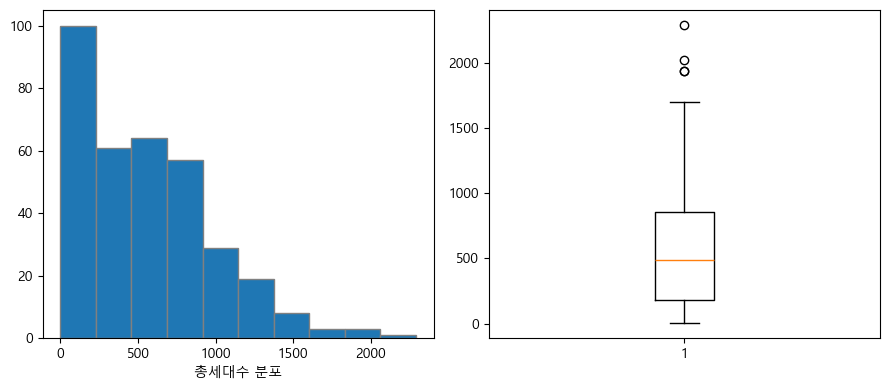

In [28]:
# 대상 총세대수, 실차량수, 임대로, 임대보증금, 총면적
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
plt.hist(base_data.총세대수, bins = 10, edgecolor = 'gray') 
plt.xlabel('총세대수 분포')
plt.subplot(1,2,2)
plt.boxplot(base_data.총세대수) 
plt.tight_layout()
plt.show()

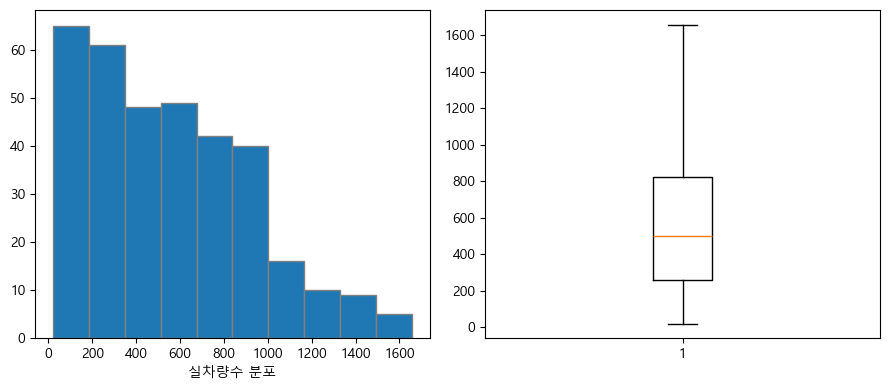

In [29]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
plt.hist(base_data.실차량수, bins = 10, edgecolor = 'gray') 
plt.xlabel('실차량수 분포')
plt.subplot(1,2,2)
plt.boxplot(base_data.실차량수) 
plt.tight_layout()
plt.show()

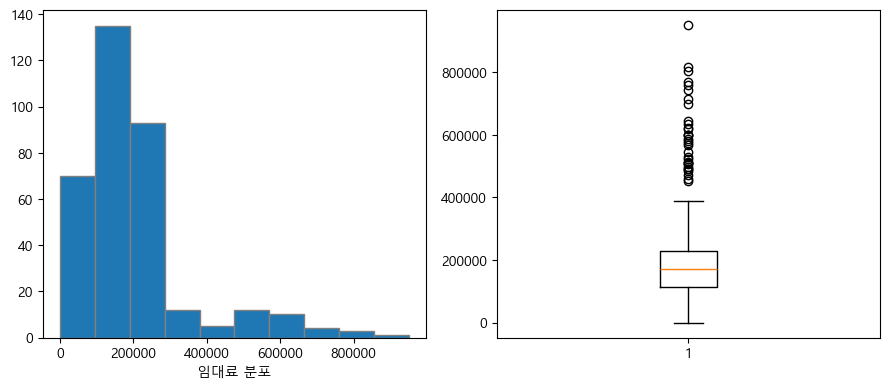

In [30]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
plt.hist(base_data.임대료, bins = 10, edgecolor = 'gray') 
plt.xlabel('임대료 분포')
plt.subplot(1,2,2)
plt.boxplot(base_data.임대료) 
plt.tight_layout()
plt.show()

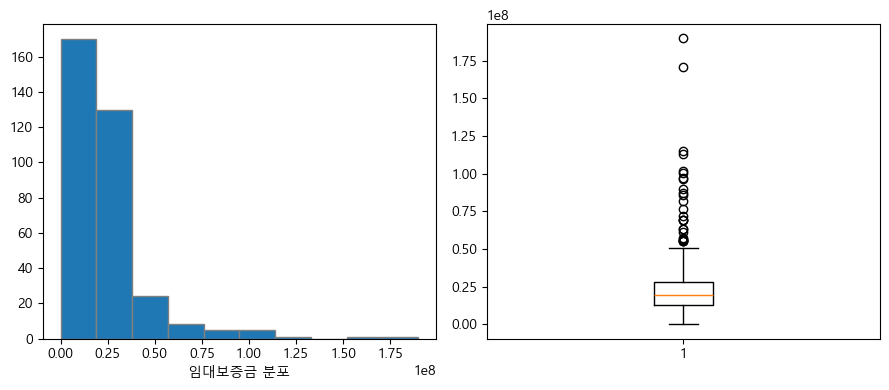

In [31]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
plt.hist(base_data.임대보증금, bins = 10, edgecolor = 'gray') 
plt.xlabel('임대보증금 분포')
plt.subplot(1,2,2)
plt.boxplot(base_data.임대보증금) 
plt.tight_layout()
plt.show()

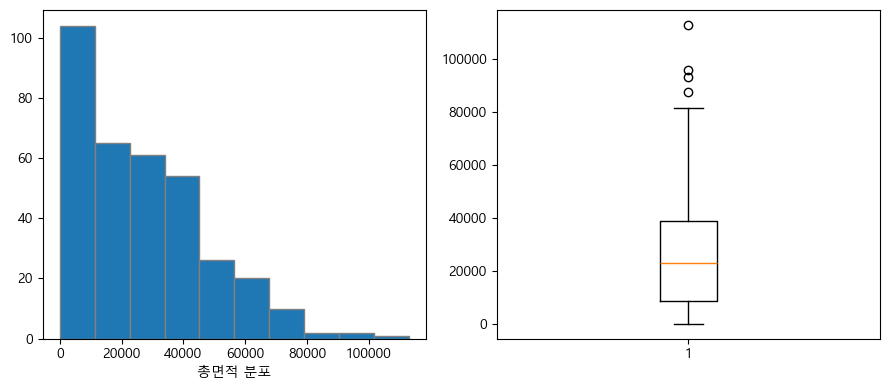

In [32]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
plt.hist(base_data.총면적, bins = 10, edgecolor = 'gray') 
plt.xlabel('총면적 분포')
plt.subplot(1,2,2)
plt.boxplot(base_data.총면적) 
plt.tight_layout()
plt.show()

    건물형태    난방방식 승강기설치여부 variable  value
0    계단식  개별가스난방  전체동 설치     총세대수     78
1    복도식  개별가스난방  전체동 설치     총세대수     35
2    계단식  개별가스난방  전체동 설치     총세대수     88
3    복도식    지역난방  전체동 설치     총세대수    477
4    복도식  개별가스난방  전체동 설치     총세대수     15
..   ...     ...     ...      ...    ...
340  복도식    중앙난방  전체동 설치     총세대수   1485
341  복도식  중앙가스난방  전체동 설치     총세대수   1386
342  복도식  지역가스난방  전체동 설치     총세대수    956
343  복도식     NaN  전체동 설치     총세대수    120
344  복도식  중앙유류난방  전체동 설치     총세대수    447

[345 rows x 5 columns]


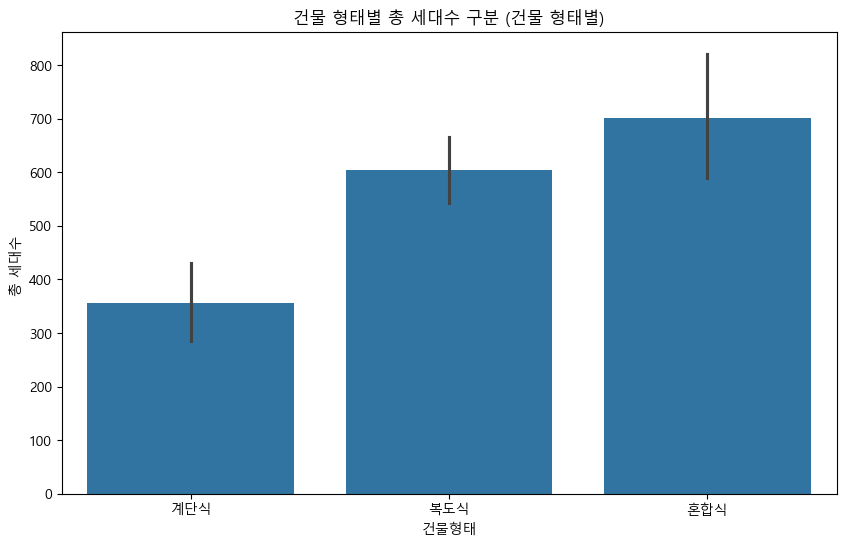

In [33]:
# pd.melt  데이터프레임의 열 요소를 행으로 추갛 
# # 대상 총세대수, 실차량수, 임대로, 임대보증금, 총면적 목표 변수들 

data_melted = pd.melt(base_data, id_vars=['건물형태','난방방식','승강기설치여부'], value_vars=['총세대수'])

# 데이터 확인
print(data_melted)

# sns.barplot을 이용한 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='건물형태', y='value')
plt.title('건물 형태별 총 세대수 구분 (건물 형태별)')
plt.xlabel('건물형태')
plt.ylabel('총 세대수 ')
plt.show()

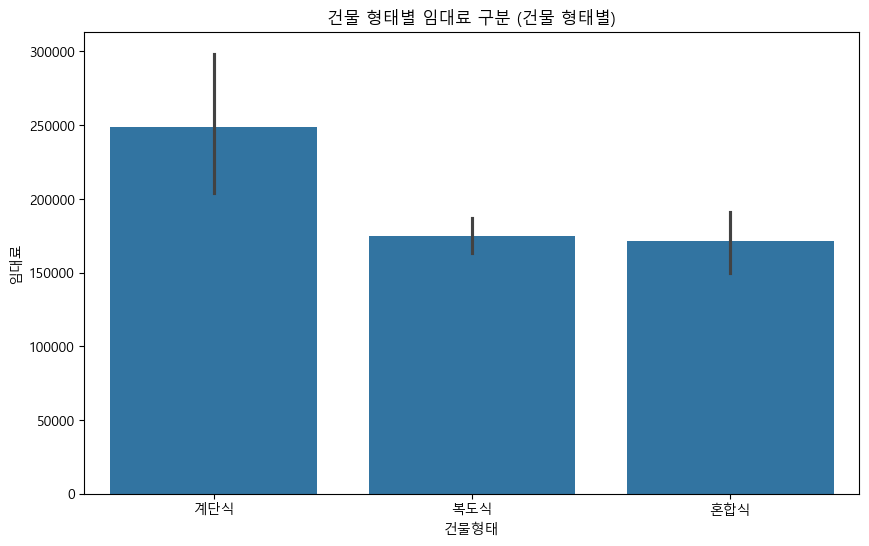

In [34]:
data_melted = pd.melt(base_data, id_vars=['건물형태','난방방식','승강기설치여부'], value_vars=['임대료'])

# sns.barplot을 이용한 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='건물형태', y='value')
plt.title('건물 형태별 임대료 구분 (건물 형태별)')
plt.xlabel('건물형태')
plt.ylabel('임대료')
plt.show()

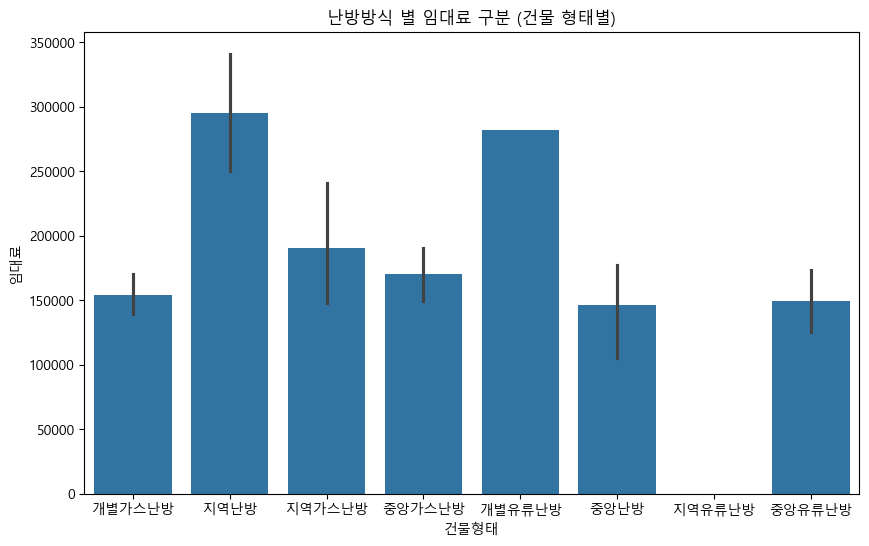

In [35]:
data_melted = pd.melt(base_data, id_vars=['건물형태','난방방식','승강기설치여부'], value_vars=['임대료'])

# sns.barplot을 이용한 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='난방방식', y='value')
plt.title('난방방식 별 임대료 구분 (건물 형태별)')
plt.xlabel('건물형태')
plt.ylabel('임대료')
plt.show()

### (3) 이변량 분석

* **세부 요구사항**
    - 숫자형 feature --> target
        - 전체 변수들 간의 상관관계 구하기
            * 범주형 변수를 제외한 데이터셋을 이용하여
            * df.corr() + sns.heatmap() 으로 전체 상관계수를 시각화 합니다.
        - 등록차량수와 상관계수가 높은 상위 3~5개에 대해서 산점도를 그려 봅시다.
    - 범주형 feature --> target
        * 지역 : sns.barplot()으로 시각화 해 봅시다.

#### 1) 전체 숫자형 변수들 간의 상관관계

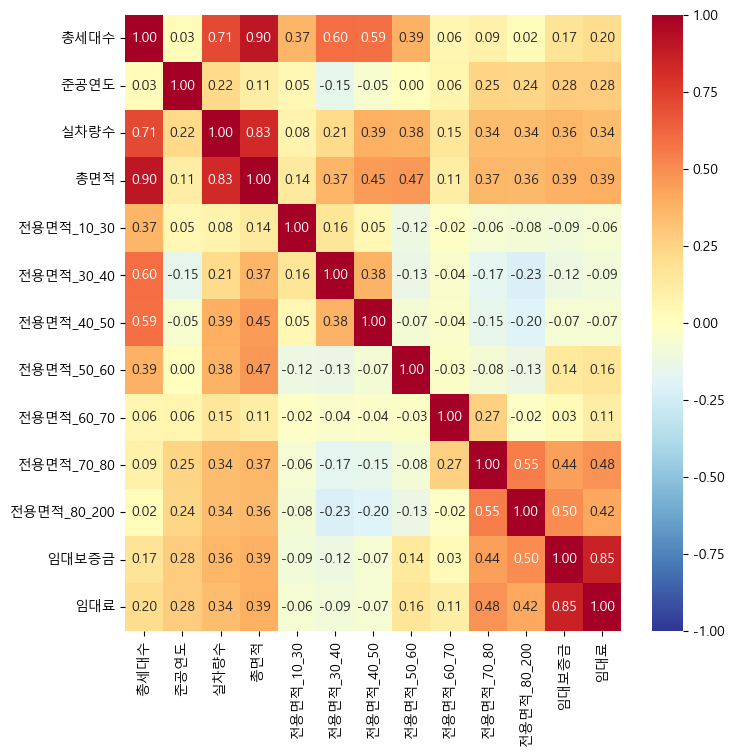

In [39]:
numerical_numerical_hitmap(base_data)

In [40]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   단지코드         345 non-null    object 
 1   총세대수         345 non-null    int64  
 2   지역           345 non-null    object 
 3   준공연도         345 non-null    int32  
 4   건물형태         339 non-null    object 
 5   난방방식         319 non-null    object 
 6   승강기설치여부      322 non-null    object 
 7   실차량수         345 non-null    int64  
 8   총면적          345 non-null    float64
 9   전용면적_10_30   345 non-null    int64  
 10  전용면적_30_40   345 non-null    int64  
 11  전용면적_40_50   345 non-null    int64  
 12  전용면적_50_60   345 non-null    int64  
 13  전용면적_60_70   345 non-null    int64  
 14  전용면적_70_80   345 non-null    int64  
 15  전용면적_80_200  345 non-null    int64  
 16  임대보증금        345 non-null    float64
 17  임대료          345 non-null    float64
dtypes: float64(3), int32(1), int64(9), object(5)
memor

In [41]:
# 숫자형 변수
# -  총세대수, 준공연도, 실차량수, 총면적 , 전용면적~10~.., 임대보증금, 임대료

# 범주형 변수 
# 지역 , 건물형태, 난방방식, 승강기설치여부 

#### 2) 숫자형 feature --> 실차량수

In [43]:
target = '실차량수'

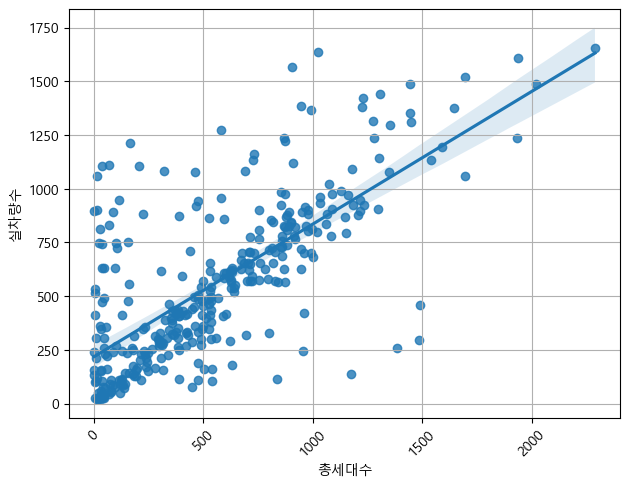

상관계수 : 0.7124746462088557, p-value : 1.0221045732952228e-54


In [44]:
numerical_numerical(base_data ,'총세대수',target)

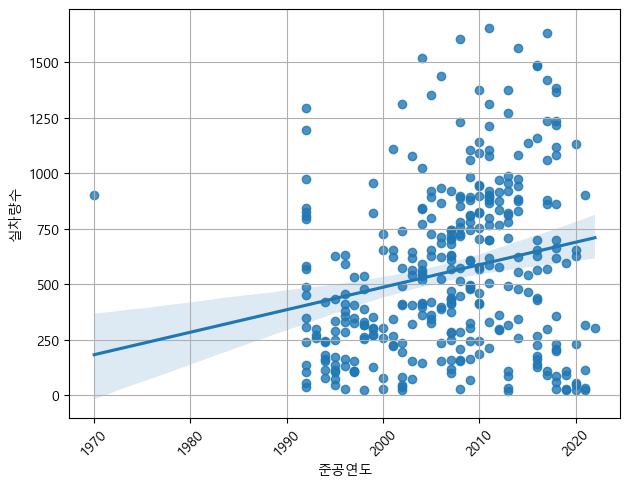

상관계수 : 0.2210380302897511, p-value : 3.4422324032311207e-05


In [45]:
numerical_numerical(base_data ,'준공연도',target)

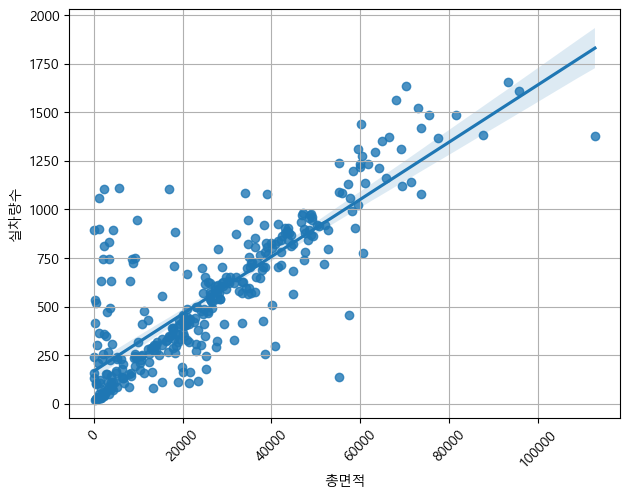

상관계수 : 0.8251022603106324, p-value : 4.625146580147052e-87


In [46]:
numerical_numerical(base_data ,'총면적',target)

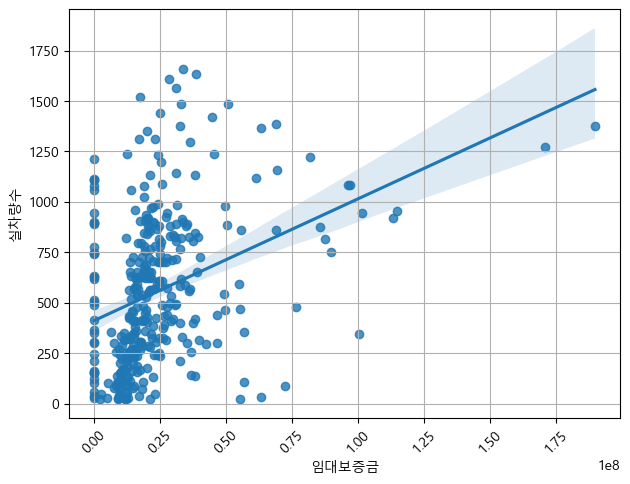

상관계수 : 0.3618671316644979, p-value : 4.109629446626115e-12


In [47]:
numerical_numerical(base_data ,'임대보증금',target)

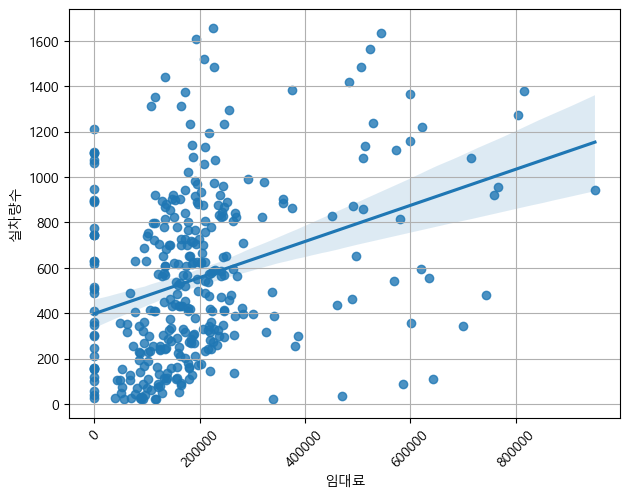

상관계수 : 0.3370663041695958, p-value : 1.301037586089997e-10


In [48]:
numerical_numerical(base_data ,'임대료',target)

#### 3) 범주형 feature --> 실차량수

In [50]:
# 범주형 변수 
# 지역 , 건물형태, 난방방식, 승강기설치여부 
f_data = base_data.copy()
print(f_data.isna().sum())
#사전 전처리 필요 


단지코드            0
총세대수            0
지역              0
준공연도            0
건물형태            6
난방방식           26
승강기설치여부        23
실차량수            0
총면적             0
전용면적_10_30      0
전용면적_30_40      0
전용면적_40_50      0
전용면적_50_60      0
전용면적_60_70      0
전용면적_70_80      0
전용면적_80_200     0
임대보증금           0
임대료             0
dtype: int64


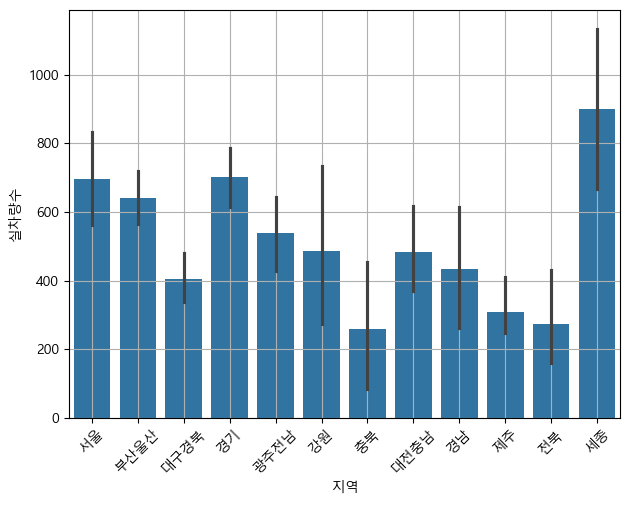

ANOVA 결과: F-statistic = 4.451857733965143, p-value = 2.8660069638343555e-06


In [51]:
# 지역 --> 실차량수 
categorical_numerical(f_data , '지역',target)

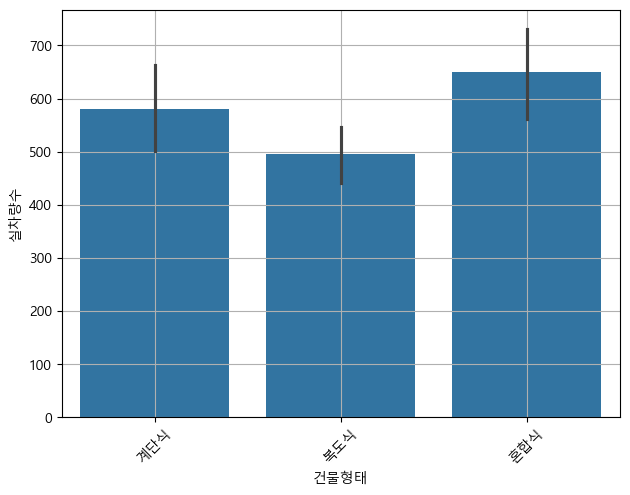

ANOVA 결과: F-statistic = 4.069674864756163, p-value = 0.018057865792971292


In [52]:
f_data01 = f_data.dropna()
categorical_numerical(f_data01 , '건물형태',target)

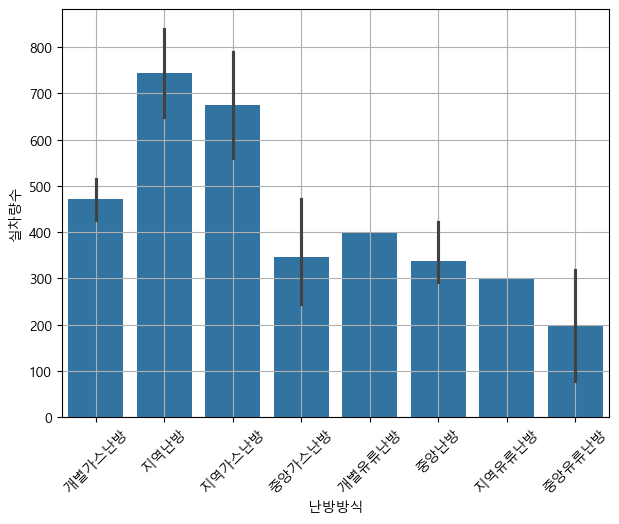

ANOVA 결과: F-statistic = 6.5101493665200785, p-value = 3.8665050416867244e-07


In [53]:
f_data02 = f_data.dropna()
categorical_numerical(f_data02 , '난방방식',target)

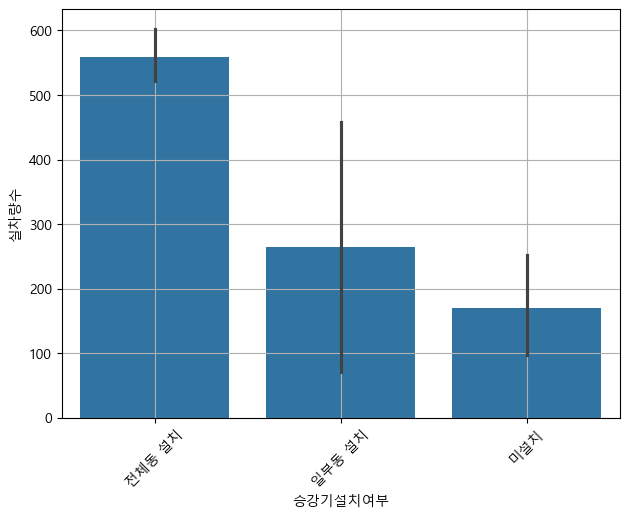

ANOVA 결과: F-statistic = 6.557524354666373, p-value = 0.0016368192981412399


In [54]:
f_data03 = f_data.dropna()
categorical_numerical(f_data03 , '승강기설치여부',target)

In [55]:
f_data.columns

Index(['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수', '총면적',
       '전용면적_10_30', '전용면적_30_40', '전용면적_40_50', '전용면적_50_60', '전용면적_60_70',
       '전용면적_70_80', '전용면적_80_200', '임대보증금', '임대료'],
      dtype='object')

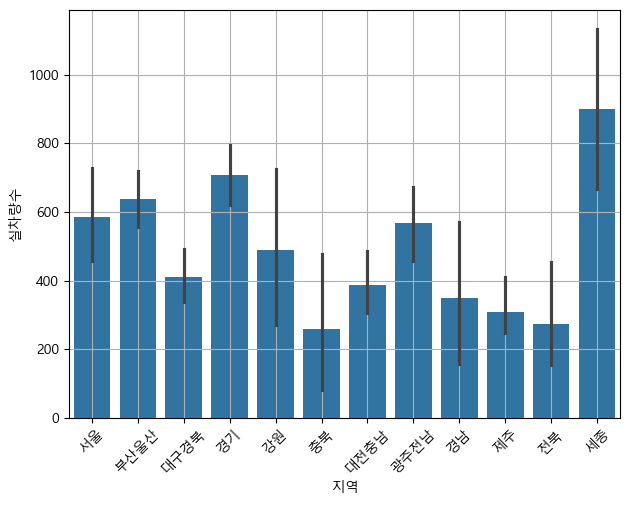

ANOVA 결과: F-statistic = 4.608159285962538, p-value = 1.8504063936339371e-06


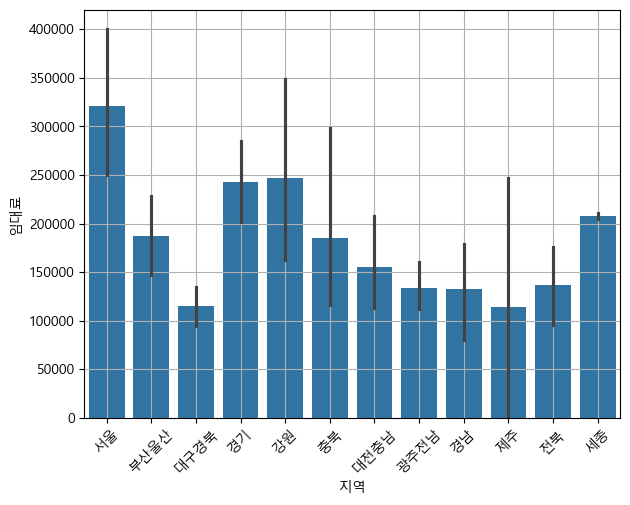

ANOVA 결과: F-statistic = 6.153324094594718, p-value = 4.569585309305971e-09


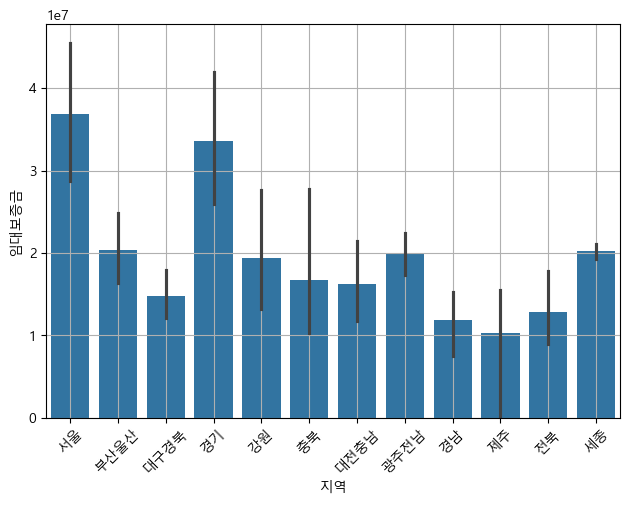

ANOVA 결과: F-statistic = 4.335996922768812, p-value = 5.311747564747127e-06


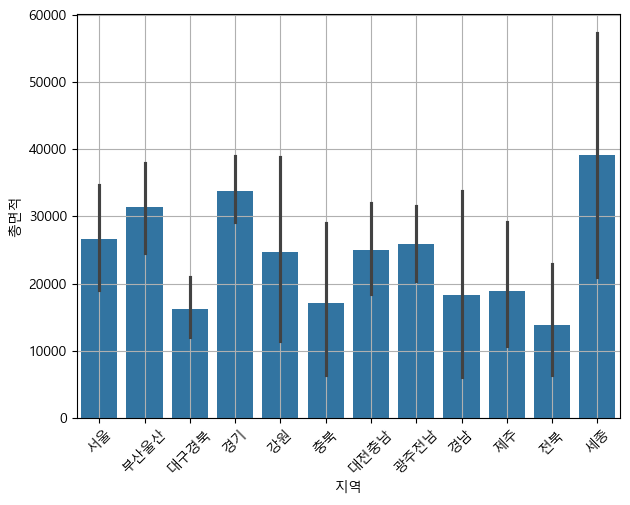

ANOVA 결과: F-statistic = 3.267870690595884, p-value = 0.00031386757225332405


In [56]:
f_data04 = f_data.dropna()
categorical_numerical(f_data04 , '지역','실차량수')
categorical_numerical(f_data04 , '지역','임대료')
categorical_numerical(f_data04 , '지역','임대보증금')
categorical_numerical(f_data04 , '지역','총면적')


## 3.전처리_추가

* **세부요구사항**
    * 다음 사항은 선택 사항입니다.
        * 난방방식, 승강기설치여부 두 변수에 대해서 적은 수의 범주를 묶는 작업을 시도하시오.
        * 지역 : 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 삭제 합니다.

## 4.요인 정리
* 실차량수(Target)에 영향을 미치는 요인에 대해서, 다음의 3 그룹으로 정리합시다.
    * 강한 관계
    * 약한 관계
    * 관계 없음

# 강한 상관관계
- 총세대수 , 총면저

  # 약한 상관관계
  - 준공년도, 임대보증금 , 임대료